In [ ]:
!pip install matplotlib opencv-python
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from google.colab import files


In [ ]:
uploaded = files.upload()
image_path = list(uploaded.keys())[0]


Saving d950ede6-4099-4f91-a8eb-a24c6f0566a9.jpg to d950ede6-4099-4f91-a8eb-a24c6f0566a9 (1).jpg


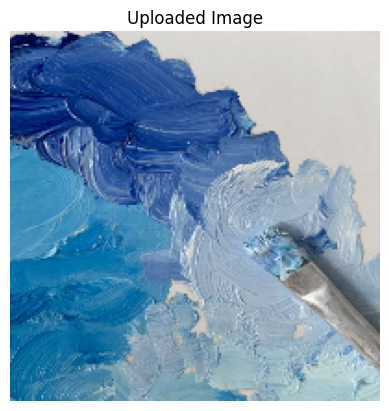

In [ ]:
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image_small = cv2.resize(image, (200, 200))
plt.imshow(image_small)
plt.axis('off')
plt.title('Uploaded Image')
plt.show()


In [ ]:
pixels = image_small.reshape(-1, 3)


In [ ]:
num_colors = 5  # You can change this number to extract more or fewer colors

kmeans = KMeans(n_clusters=num_colors, random_state=42)
kmeans.fit(pixels)

colors = kmeans.cluster_centers_.astype(int)


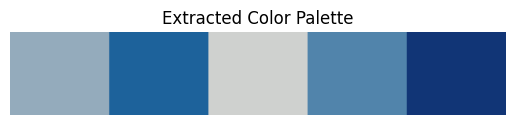

In [ ]:
def plot_palette(colors):
    palette = np.zeros((50, 300, 3), dtype='uint8')
    steps = 300 // len(colors)

    for i, color in enumerate(colors):
        start = i * steps
        end = start + steps
        palette[:, start:end, :] = color

    plt.imshow(palette)
    plt.axis('off')
    plt.title('Extracted Color Palette')
    plt.show()

plot_palette(colors)


In [ ]:
def rgb_to_hex(color):
    return '#{:02x}{:02x}{:02x}'.format(int(color[0]), int(color[1]), int(color[2]))

hex_codes = [rgb_to_hex(color) for color in colors]
print("Hex Codes of Palette Colors:")
for code in hex_codes:
    print(code)


Hex Codes of Palette Colors:
#94abbc
#1d629b
#cfd1cf
#5184ab
#113576


In [ ]:
labels = kmeans.labels_
counts = np.bincount(labels)
percentages = counts / len(labels)

def rgb_to_hex(color):
    return '#{:02x}{:02x}{:02x}'.format(int(color[0]), int(color[1]), int(color[2]))

print("Hex Codes with Percentages:")
for color, pct in zip(colors, percentages):
    hex_code = rgb_to_hex(color)
    print(f"{hex_code}: {pct*100:.2f}%")


Hex Codes with Percentages:
#94abbc: 26.44%
#1d629b: 20.24%
#cfd1cf: 22.19%
#5184ab: 21.37%
#113576: 9.77%


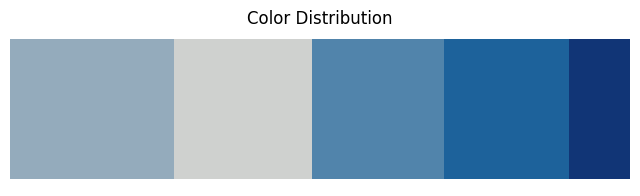

In [ ]:
def plot_color_bar(colors, percentages):
    sorted_idx = np.argsort(percentages)[::-1]
    sorted_colors = colors[sorted_idx]
    sorted_percentages = percentages[sorted_idx]

    fig, ax = plt.subplots(figsize=(8, 2))
    start = 0

    for color, pct in zip(sorted_colors, sorted_percentages):
        ax.barh(0, pct, left=start, color=np.array(color/255).reshape(1, -1))
        start += pct

    ax.set_xlim(0, 1)
    ax.axis('off')
    plt.title("Color Distribution")
    plt.show()

plot_color_bar(colors, percentages)


In [ ]:
def get_palette_mood(colors):
    avg_brightness = np.mean([np.mean(color) for color in colors])
    if avg_brightness > 180:
        return "Bright and cheerful mood 🌞"
    elif avg_brightness < 80:
        return "Dark and moody 🌑"
    else:
        return "Calm and balanced 😌"


In [ ]:
mood = get_palette_mood(colors)
print("Suggested palette mood:", mood)


Suggested palette mood: Calm and balanced 😌


In [ ]:
def create_mock_design(colors):
    design = np.zeros((300, 300, 3), dtype='uint8')
    num = len(colors)
    stripe_height = 300 // num

    for i, color in enumerate(colors):
        design[i * stripe_height:(i + 1) * stripe_height, :] = color

    plt.imshow(design)
    plt.axis('off')
    plt.title("Mock Design using Palette")
    plt.show()


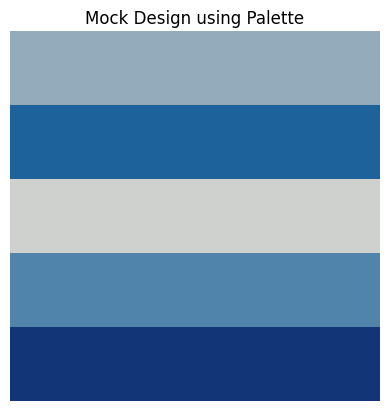

In [ ]:
create_mock_design(colors)


In [ ]:
def create_gradient(c1, c2, width=300, height=100):
    gradient = np.zeros((height, width, 3), dtype=np.uint8)
    for i in range(width):
        alpha = i / width
        color = (1 - alpha) * np.array(c1) + alpha * np.array(c2)
        gradient[:, i] = color.astype(np.uint8)
    plt.imshow(gradient)
    plt.axis('off')
    plt.title("Gradient Example")
    plt.show()


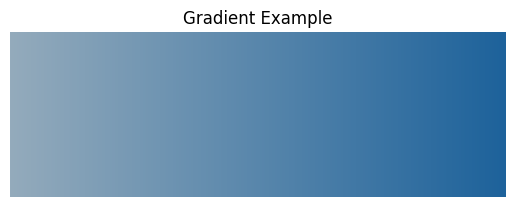

In [ ]:
create_gradient(colors[0], colors[1])


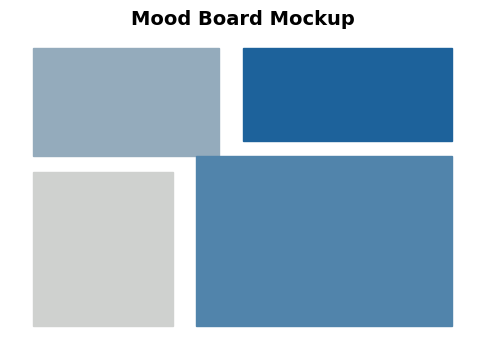

In [ ]:
import matplotlib.pyplot as plt

# Mood board mockup
fig, ax = plt.subplots(figsize=(6, 4))
ax.axis('off')

# Example positions for rectangles
positions = [(0.05, 0.6, 0.4, 0.35), (0.5, 0.65, 0.45, 0.3),
             (0.05, 0.05, 0.3, 0.5), (0.4, 0.05, 0.55, 0.55)]

# Loop through your extracted colors (assuming they are stored in "colors" variable)
for i, pos in enumerate(positions):
    if i < len(colors):
        hex_code = '#{:02x}{:02x}{:02x}'.format(int(colors[i][0]), int(colors[i][1]), int(colors[i][2]))
    else:
        hex_code = "#cccccc"  # fallback gray
    ax.add_patch(plt.Rectangle((pos[0], pos[1]), pos[2], pos[3],
                               color=hex_code))

ax.set_title("Mood Board Mockup", fontsize=14, fontweight='bold')
plt.show()


In [ ]:
def contrast_ratio(c1, c2):
    l1 = 0.2126*c1[0]/255 + 0.7152*c1[1]/255 + 0.0722*c1[2]/255
    l2 = 0.2126*c2[0]/255 + 0.7152*c2[1]/255 + 0.0722*c2[2]/255
    return abs(l1 - l2)

lightest = max(colors, key=lambda c: np.mean(c))
darkest = min(colors, key=lambda c: np.mean(c))

ratio = contrast_ratio(lightest, darkest)
print(f"Approx. contrast ratio: {ratio:.2f}")
if ratio > 0.5:
    print("✅ Good contrast for text")
else:
    print("⚠️ Low contrast, may be hard to read")


Approx. contrast ratio: 0.62
✅ Good contrast for text


In [ ]:
!pip install gradio webcolors

import gradio as gr
from PIL import Image
import numpy as np
import cv2
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import webcolors

def analyze_palette(image):
    def rgb_to_hex(color):
        return '#{:02x}{:02x}{:02x}'.format(int(color[0]), int(color[1]), int(color[2]))

    def closest_css3_name(requested_rgb):
        min_distance = float('inf')
        closest_name = None
        for hex_value, name in webcolors.CSS3_HEX_TO_NAMES.items():
            r_c, g_c, b_c = webcolors.hex_to_rgb(hex_value)
            distance = (r_c - requested_rgb[0])**2 + (g_c - requested_rgb[1])**2 + (b_c - requested_rgb[2])**2
            if distance < min_distance:
                min_distance = distance
                closest_name = name
        return closest_name

    def get_palette_mood(colors):
        avg_brightness = np.mean([np.mean(color) for color in colors])
        if avg_brightness > 180:
            return "Bright and cheerful 🌞"
        elif avg_brightness < 80:
            return "Dark and moody 🌑"
        else:
            return "Calm and balanced 😌"

    image = image.convert("RGB")
    image_np = np.array(image)
    image_small = cv2.resize(image_np, (200, 200))
    pixels = image_small.reshape(-1, 3)

    num_colors = 5
    kmeans = KMeans(n_clusters=num_colors, random_state=42, n_init=10)
    kmeans.fit(pixels)
    colors = kmeans.cluster_centers_.astype(int)
    labels = kmeans.labels_
    counts = np.bincount(labels)
    percentages = counts / len(labels)

    summary = ""
    for color, pct in zip(colors, percentages):
        hex_code = rgb_to_hex(color)
        try:
            name = webcolors.hex_to_name(hex_code, spec='css3')
        except ValueError:
            name = closest_css3_name(color)
        summary += f"{hex_code} ({name}): {pct*100:.2f}%\n"

    mood = get_palette_mood(colors)
    summary += f"\nSuggested mood: {mood}"

    # Generate palette image
    palette_img = np.zeros((50, 300, 3), dtype='uint8')
    steps = 300 // len(colors)
    for i, color in enumerate(colors):
        start = i * steps
        end = start + steps
        palette_img[:, start:end, :] = color

    plt.figure(figsize=(6, 2))
    plt.imshow(cv2.cvtColor(palette_img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title("Color Palette")
    plt.savefig("palette.png")
    plt.close()

    return summary, "palette.png"

iface = gr.Interface(
    fn=analyze_palette,
    inputs=gr.Image(type="pil"),
    outputs=[gr.Textbox(label="Palette Summary"), gr.Image(label="Color Palette")]
)

iface.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://1747263b433714d9df.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
